In [1]:
# author: asmita chatterjee
#  dataset source :https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
 
#  About the data  set :
#      Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

# The company wants to automate the loan eligibility process (real time) based on customer detail
#  provided while filling online application form. 
#  These details are:
#   Gender, 
#  Marital Status, 
#  Education,
#  Number of Dependents,
#  Income, 
#  Loan Amount,
#  Credit History 
# and
#  others.
#  To automate this process, they have given a problem to identify the customers segments,
#  those are eligible for loan amount 
# so that they can specifically target these customers. Here they have provided a partial data set.

import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")



In [3]:
## read the data directly from the data files 
train = pd.read_csv('C:/Users/USER/Documents/datasets/final_data/Loan_pred/train.csv')
test = pd.read_csv('C:/Users/USER/Documents/datasets/final_data/Loan_pred/test.csv')



# Train file will be used for training the model, i.e. our model will learn from this file.
#  It contains all the independent variables and the target variable. 
#  Test file contains all the independent variables,
# but not the target variable. We will apply the model to predict the target variable for the test data

# Last but not the least , we will submit the predictions in 
# Sample submission file.csv 

In [4]:
# Let’s make a copy of train and test data so that even if we have to make any changes in these datasets 
# we would not lose the original datasets.

train_original = train.copy()
test_original = test.copy()

In [5]:
# Firstly, we will check the features present in our data and then we will look at their data types.

train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.shape,test.shape

((614, 13), (367, 12))

In [8]:
#checking missing values in each column of train dataset

train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#checking missing values in each column of test dataset
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
# let us look into the target variable 

train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

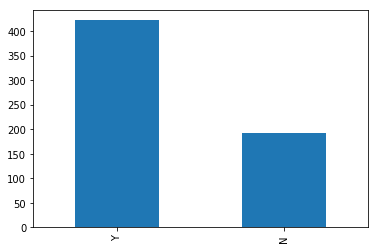

In [11]:
train['Loan_Status'].value_counts().plot.bar()

In [13]:
# now 
#  There are 3 types of variables:
     
#  -->Categorical: ( if any of these below mentioned variables are not turned to binary numercial , then we will use
#                          numerical encoding to do so)
#      Gender,
#      Married,
#      Self_Employed,
#      Credit_History,
#      Loan_Status)
 
#  --->Ordinal features: Variables in categorical features having some order involved :
#  (Dependents-- this is an ordinal variable , since having more number of dependents, reduces a loan eligibility  
#  Education----a more educated person has higher probabiity of getting a loan 
#  Property_Area---a person from a developed region , has a better loan eligbility 
 
#  ---> Numerical : 
#        ApplicantIncome,
#        CoapplicantIncome,
#        LoanAmount,
# #        Loan_Amount_Term 

## let us first visualize categorical features  by thir indivdual bar plots
## make a function

def bar_chart(feature):
    loan_status_y  = train[train['Loan_Status']=='Y'][feature].value_counts()
    loan_status_n = train[train['Loan_Status']=='N'][feature].value_counts()
    df = pd.DataFrame([loan_status_y,loan_status_n])
    df.index = ['Eligible','In-eligible']
    df.plot(kind='bar',stacked=True, figsize=(10,5))


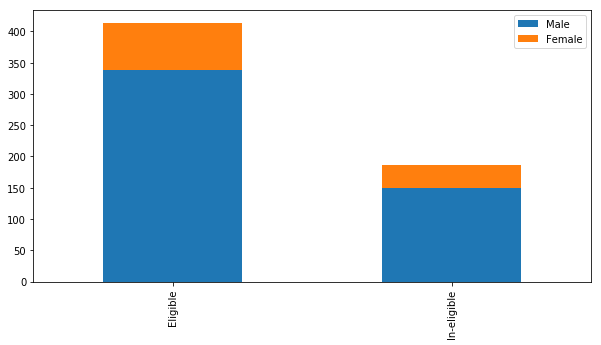

In [15]:
## check the bar chart for Gender
    
bar_chart("Gender") 

# It is evident , that number pf male are more eligible
#     to get loan , than female 

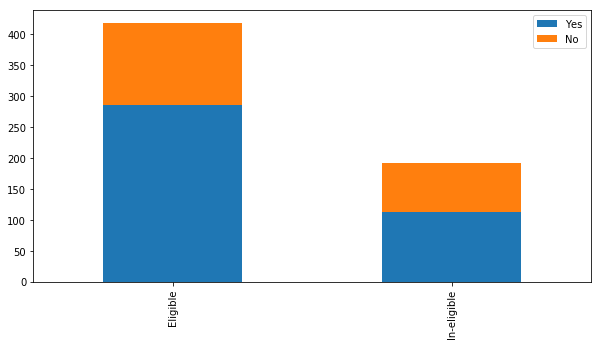

In [16]:
 bar_chart("Married") 
 ##
#    It is evident , that  married people are more eligible to get loan
#    than unmarried people 
  

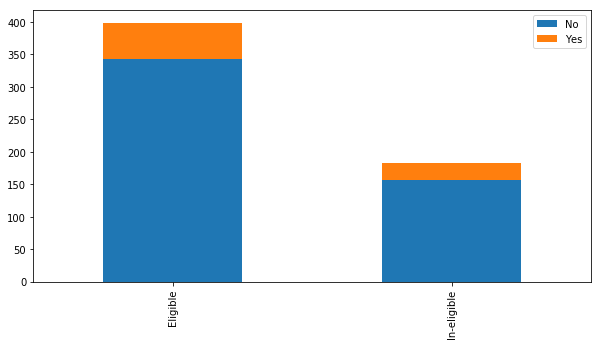

In [17]:
bar_chart("Self_Employed") 

#  It is evident , that non self employed people are more eligible 
#    to get loan , than self employed people

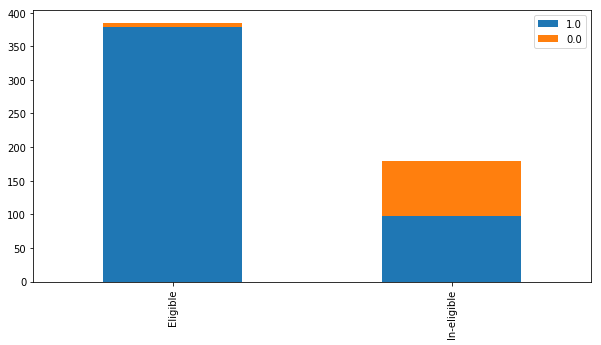

In [18]:
 bar_chart("Credit_History") 
    
#      credit history with 1 has higher eligibility  of getting loans
   
#     credit history =1 means repayed the debt 

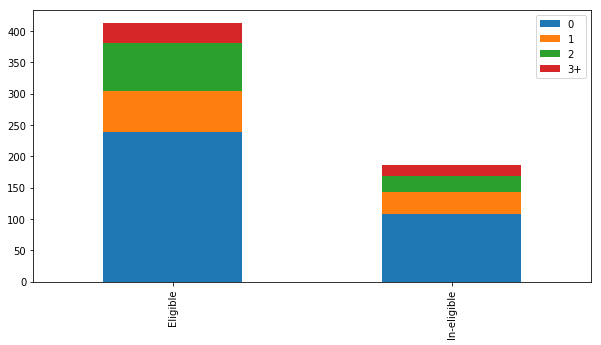

In [19]:
### Let us now check the Ordinal features
###Dependents

bar_chart("Dependents") 
#  People with dependents 0   or 2 are more eligible 

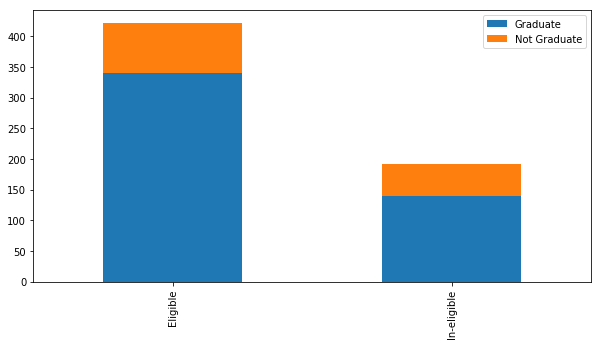

In [21]:
### Education
bar_chart("Education")

#Graduates are more eligible to get loan  

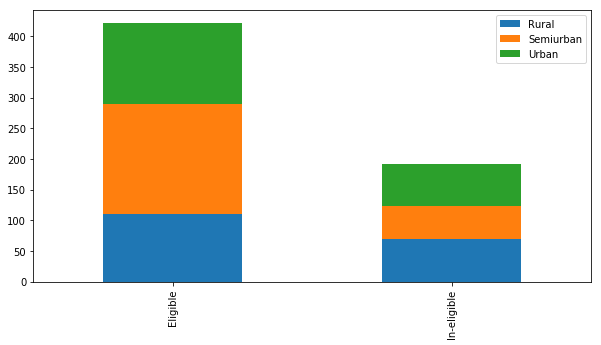

In [22]:
 bar_chart("Property_Area")
    
#      Semi urban people  are more eligible to get loan  

In [24]:
   #### MISSING VALUE IMPUTATION 
   ##  Amongst the numeric variables :          
#     ApplicantIncome,
#        CoapplicantIncome,
#        LoanAmount,
#        Loan_Amount_Term 
       
#        the missing variables are :
#            LoanAmount and Loan_Amount_Term
       
#         First carrying out the missing value imputation of these 2 variables:

 ###Loan_Amount
    ## Since loan amount is a numeric variable , so we will replace the term with median 
    
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [25]:
# Since test  data set also has missing values for LoanAmount , so we will use the same strategy  for test data set
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True) 

In [27]:
###Loan_Amount_Term- Finding out the counts of the various values of the Loan amount term 
   
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [29]:
#  so we can see  value 360 is  used in 512 records.hence it is the mode value 
#  Hence we will use this  mode value  as a missing value substitute:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
    

In [30]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)

In [ ]:
# For the other 2 numerical variables , theera re no missing values in ether Train or Test
#     ApplicantIncome,
#     CoApplicantIncome

# For categorical variables: imputation using mode
# There are very less missing values 
#  Gender, Married, Dependents, Credit_History and Self_Employed features 
#  so we can fill them using the mode of the features. 

In [32]:
## For Gender 
 
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)


In [33]:
### For Married ## 
 
train['Married'].fillna("No",inplace=True)

In [34]:
## for dependents , wherever , missing , replace with 0
train['Dependents'].fillna(0, inplace=True)
test['Dependents'].fillna(0, inplace=True)


In [35]:
## For Self_Employed### For null values , replace with a No
## we are assuming that if the value is NUll , the concerned applicant is not self applicant 

train['Self_Employed'].fillna("No", inplace=True)
test['Self_Employed'].fillna("No", inplace=True)



In [36]:
### For Credit_History### Fill 0 whereevr empty

### replace the credit history with 0 value , whrever the history  s NULL
### we are assuming that in case of NUll value , th concerned applicant  has a bad credit history 

train['Credit_History'].fillna(0, inplace=True)
test['Credit_History'].fillna(0, inplace=True)


In [37]:
## feature engineering 
##### add the  applicant income as well as the co applicant income 

train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']


In [38]:
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)


In [39]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0


In [40]:
### now we need to discretize the various variables - categorical and numeric 
#### Categorical
## Change categorical variables Gender to numeric categorical

train['Gender'] = train['Gender'].map( {'Male': 0, 'Female': 1} )
test['Gender'] = test['Gender'].map( {'Male': 0, 'Female': 1} )



### Change categorical variable Married to numeric categorical
train['Married'] = train['Married'].map( {'No': 0, 'Yes': 1} )
test['Married'] = test['Married'].map( {'No': 0, 'Yes': 1} )

###Change categorical variable Education to numeric categorical
train['Education'] = train['Education'].map( {'Not Graduate': 0, 'Graduate': 1} )
test['Education'] = test['Education'].map( {'Not Graduate': 0, 'Graduate': 1} )

###Change categorical variable Self Employed to numeric categorical
train['Self_Employed'] = train['Self_Employed'].map( {'No': 0, 'Yes': 1} )
test['Self_Employed'] = test['Self_Employed'].map( {'No': 0, 'Yes': 1} )


###Change categorical variable Property_Area to numeric categorical

train['Property_Area'] = train['Property_Area'].map( {'Rural': 1, 'Semiurban': 2,'Urban': 3} )
test['Property_Area'] = test['Property_Area'].map( {'Rural': 1, 'Semiurban': 2 ,'Urban': 3} )


###Change categorical variable Loan_status  to numeric categorical

train['Loan_Status'] = train['Loan_Status'].map( {'N': 0, 'Y': 1} )


In [41]:
## Take the Loanid in a variable 

Loan_ID = test['Loan_ID']


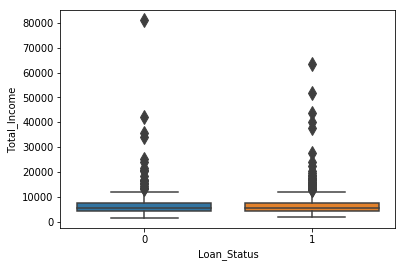

In [42]:
###########now  discretizing the numeric variables #########

# numeric variables 
#  ApplicantIncome,
#        CoapplicantIncome,
#        LoanAmount,
#        Loan_Amount_Term 
#        Total_Income


#Check the boxplot of loan status with total income

sns.boxplot(x=train["Loan_Status"], y=train["Total_Income"],width=0.8,fliersize=10)

## so there are outiers . we can discretize accordingly having a visual look

In [44]:
 ### join the data into a single list 
total=[train,test]
  

In [45]:
for dataset in total:
   dataset.loc[ dataset['Total_Income'] <= 5000, 'Total_Income'] = 1,
   dataset.loc[(dataset['Total_Income'] > 5000) & (dataset['Total_Income'] <=7500), 'Total_Income'] = 2,
   dataset.loc[(dataset['Total_Income'] > 7500) & (dataset['Total_Income'] <= 10000), 'Total_Income'] = 3,
   dataset.loc[(dataset['Total_Income'] > 10000) & (dataset['Total_Income'] <= 20000), 'Total_Income'] = 4,
   dataset.loc[(dataset['Total_Income'] > 20000) & (dataset['Total_Income'] <= 30000), 'Total_Income'] = 5,
   dataset.loc[(dataset['Total_Income'] > 30000) & (dataset['Total_Income'] <= 4000), 'Total_Income'] = 6,
   dataset.loc[ dataset['Total_Income'] > 4000, 'Total_Income'] = 7


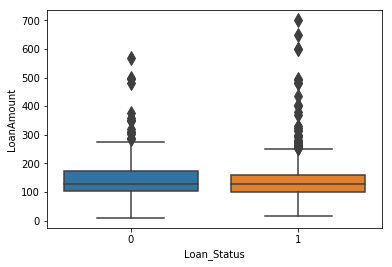

In [46]:
## Next check the bar plots of LoanAmount

sns.boxplot(x=train["Loan_Status"], y=train["LoanAmount"],width=0.8,fliersize=10)


In [47]:
## discretize
for dataset in total:
   dataset.loc[ dataset['LoanAmount'] <= 100, 'LoanAmount'] = 1,
   dataset.loc[(dataset['LoanAmount'] > 100) & (dataset['LoanAmount'] <=125), 'LoanAmount'] = 2,
   dataset.loc[(dataset['LoanAmount'] > 125) & (dataset['LoanAmount'] <= 175), 'LoanAmount'] = 3,
   dataset.loc[(dataset['LoanAmount'] > 175) & (dataset['LoanAmount'] <= 250), 'LoanAmount'] = 4,
   dataset.loc[(dataset['LoanAmount'] > 250) & (dataset['LoanAmount'] <= 300), 'LoanAmount'] = 5,
   dataset.loc[(dataset['LoanAmount'] > 300) & (dataset['LoanAmount'] <= 400), 'LoanAmount'] = 6,
   dataset.loc[ dataset['LoanAmount'] > 400, 'LoanAmount'] = 7


In [49]:
## Next check the bar plots of Loan_Amount_Term
### All the terms of Loan_Amount_Term are discrete . Seeing those oce more 
train['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [50]:
test['Loan_Amount_Term'].value_counts()

360.0    317
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
6.0        1
120.0      1
36.0       1
350.0      1
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

In [51]:
for dataset in total:
   dataset.loc[ dataset['Loan_Amount_Term'] <= 250, 'Loan_Amount_Term'] = 1,
   dataset.loc[(dataset['Loan_Amount_Term'] > 250) & (dataset['Loan_Amount_Term'] <=300), 'Loan_Amount_Term'] = 2,
   dataset.loc[(dataset['Loan_Amount_Term'] > 300) & (dataset['Loan_Amount_Term'] <= 400), 'Loan_Amount_Term'] = 3,
   dataset.loc[ dataset['Loan_Amount_Term'] > 400, 'Loan_Amount_Term'] = 4
 

In [52]:
## dropping the redundant variables- Loan_ID , ApplicantIncome,CoapplicantIncome
   
train=train.drop(['ApplicantIncome', 'CoapplicantIncome','Loan_ID'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome','Loan_ID'], axis=1)
   

In [53]:
train.head(15)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,0,0,1,0,3.0,3.0,1.0,3,1,2.0
1,0,1,1,1,0,3.0,3.0,1.0,1,0,2.0
2,0,1,0,1,1,1.0,3.0,1.0,3,1,1.0
3,0,1,0,0,0,2.0,3.0,1.0,3,1,1.0
4,0,0,0,1,0,3.0,3.0,1.0,3,1,2.0
5,0,1,2,1,1,5.0,3.0,1.0,3,1,3.0
6,0,1,0,0,0,1.0,3.0,1.0,3,1,1.0
7,0,1,3,1,0,3.0,3.0,0.0,2,0,2.0
8,0,1,2,1,0,3.0,3.0,1.0,3,1,2.0
9,0,1,1,1,0,6.0,3.0,1.0,2,0,5.0


In [54]:
## next split the independent variables 
##

X = train.drop('Loan_Status',1)
X.head(2)



,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,0,0,0,1,0,3.0,3.0,1.0,3,2.0
1,0,1,1,1,0,3.0,3.0,1.0,1,2.0


In [55]:
y = train.Loan_Status

In [56]:
### Now applying cross validation to check the details 

## applying gridsearcv
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, model_selection
from sklearn.metrics import accuracy_score


classifier = DecisionTreeClassifier()
dt_grid = {'max_depth':[3,4,5,6,7,8,9,10], 'criterion':['gini','entropy']}
grid_classifier = model_selection.GridSearchCV(classifier, dt_grid, cv=10, scoring='accuracy',refit=True, 
                                              n_jobs=-1, return_train_score=True)


from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3, random_state=1)


In [57]:
grid_classifier.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [58]:
print(grid_classifier.best_params_)

{'criterion': 'gini', 'max_depth': 5}


In [59]:
print(grid_classifier.best_score_)

0.7645687645687645


In [61]:
final_model = grid_classifier.best_estimator_
print(final_model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [67]:
### now applying the bext parramatrs on the final tree model 
# Create Decision Tree with max_depth = 5, criterion : gini 

from sklearn.model_selection import StratifiedKFold
i=1
kf = StratifiedKFold(n_splits=10,random_state=100,shuffle=True)
for train_index,test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xval = X.loc[train_index],X.loc[test_index]
  ytr,yval = y[train_index],y[test_index]   
  model = tree.DecisionTreeClassifier(random_state=100,criterion='gini',max_depth = 5)
  model.fit(xtr, ytr)
  pred_test = model.predict(xval)
  score = accuracy_score(yval,pred_test)
  print('accuracy_score',score)
  i+=1


1 of kfold 10
accuracy_score 0.746031746031746

2 of kfold 10
accuracy_score 0.7142857142857143

3 of kfold 10
accuracy_score 0.8524590163934426

4 of kfold 10
accuracy_score 0.7377049180327869

5 of kfold 10
accuracy_score 0.7377049180327869

6 of kfold 10
accuracy_score 0.6885245901639344

7 of kfold 10
accuracy_score 0.6721311475409836

8 of kfold 10
accuracy_score 0.7213114754098361

9 of kfold 10
accuracy_score 0.7868852459016393

10 of kfold 10
accuracy_score 0.7213114754098361


In [68]:
## fit the model in the test data 
pred_test = model.predict(test)


In [69]:
## converting the data set to test data set 

submission = pd.DataFrame({
        "Loan_ID": Loan_ID,### from the assigned variable 
        "Loan_Status": pred_test
    })

##submission['Loan_Status']=pred_test            # filling Loan_Status with predictions
###submission['Loan_ID']=test_original['Loan_ID'] # filling Loan_ID with test Loan_ID# replacing 0 and 1 with N and Y
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

# Converting submission file to .csv format
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Decision_tree_prediction.csv') 



In [70]:
with open("prediction_tree.dot", 'w') as f:
     f = tree.export_graphviz(model,
                              out_file=f,
                              max_depth = 5,
                              impurity = True,
                              feature_names = list(train.drop(['Loan_Status'], axis=1)),
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )

In [ ]:
## Check the document Prediction_tree_decision_tree.docx for th tre structure 
# Check the submission file for the predictions of loan status for various loan ids 